In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Tensorflow/Keras Basic Neural Network

Thanks to [sentdex](http://www.youtube.com/@sentdex) for teaching this!

In [2]:
import tensorflow as tf

tf.__version__

'2.13.0'

## We are going to use the Mnist Dataset

It consists of:

**28x28 images** of **hand-written digits** from **0 to 9**

In [4]:
mnist = tf.keras.datasets.mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Example of a training input value:**

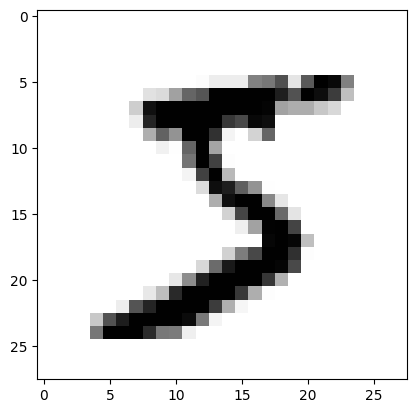

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'binary')
plt.show()

### Normalize data

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

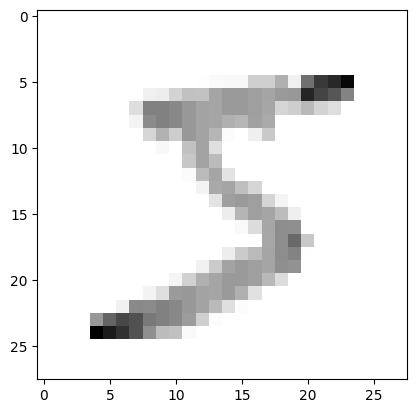

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'binary')
plt.show()

You can see that the **color has faded a bit** thats because **we have squished the values in the arrays into numbers between 0 and 1** because **small numbers lets Neural Network not explode and work with them better**.

## **Building the model**

We will build a "Sequential" model, its basically a **feed-forward model**.

In [11]:
model = tf.keras.models.Sequential()

Right now, our **images are a 28 by 28 array**. We **DO NOT** want that.

In this case, **we want them to be "flat"**.

We can either use **numpy reshape** or we can use one of the **built-in layers in Keras called "Flatten"**

Even though **"Flatten"** **isn't really a layer in the neural network**, it is provided in keras under layers. It just **flattens the values before passing it onto the next layer**.

In [12]:
model.add(tf.keras.layers.Flatten())

Since this **isn't really that complex a problem**, we will use only **2 "Dense" layers** and we will add the "relu" (Rectified Linear Unit) Activation function.

In [13]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#### **Our output layer:**

We are gonna have **10 neurons in the output layer** because thats the **amount of possible outputs there can be 0-9** and we will make use of the **Softmax Function**.

In [14]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Our model is basically **done  and designed**. Now we have to **define some parameters for training our model**.

For **optimization**, we will use the **"Adam" optimizer**
For **minimizing loss**, we will use the **Categorical Cross Entropy Loss function.**
For **metrics**, we will **track the accuracy** as we train.

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2611 - accuracy: 0.9223
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1084 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0730 - accuracy: 0.9772


Thats good! 

We have a **loss of only 0.073** and an **accuracy of 97%** in **just three epochs!**

### Evaluation

Now, lets calculate the **validation loss and validation accuracy**:

In [17]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9724
0.09009364992380142 0.9724000096321106


Our **out-of-sample loss is 0.09 and accuracy is 97%**, which is also good!

## Save the model

In [18]:
model.save("Eye_For_Number.model")

#### Importing the saved model

In [19]:
new_model = tf.keras.models.load_model("Eye_For_Number.model")

#### Predicitng with the model

In [21]:
predictions = new_model.predict([X_test])

print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
7


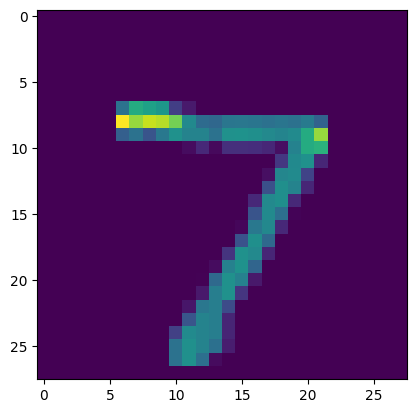

In [22]:
plt.imshow(X_test[0])
plt.show()

**That indeed is a 7!**